# STC Jawwy

In [2]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
#!pip install pyxlsb
#!pip install statsmodels

'\nHere we install libraries that are not installed by default \nExample:  pyslsb\nFeel free to add any library you are planning to use.\n'

In [3]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [4]:
dataframe = pd.read_excel("stc TV Data Set_T2.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [5]:
# check the data shape
dataframe.shape

(86, 2)

In [6]:
# display the first 5 rows 
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [7]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [8]:
# describe the numeric values in the dataset
dataframe.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [9]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [10]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools


In [11]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [12]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [23]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

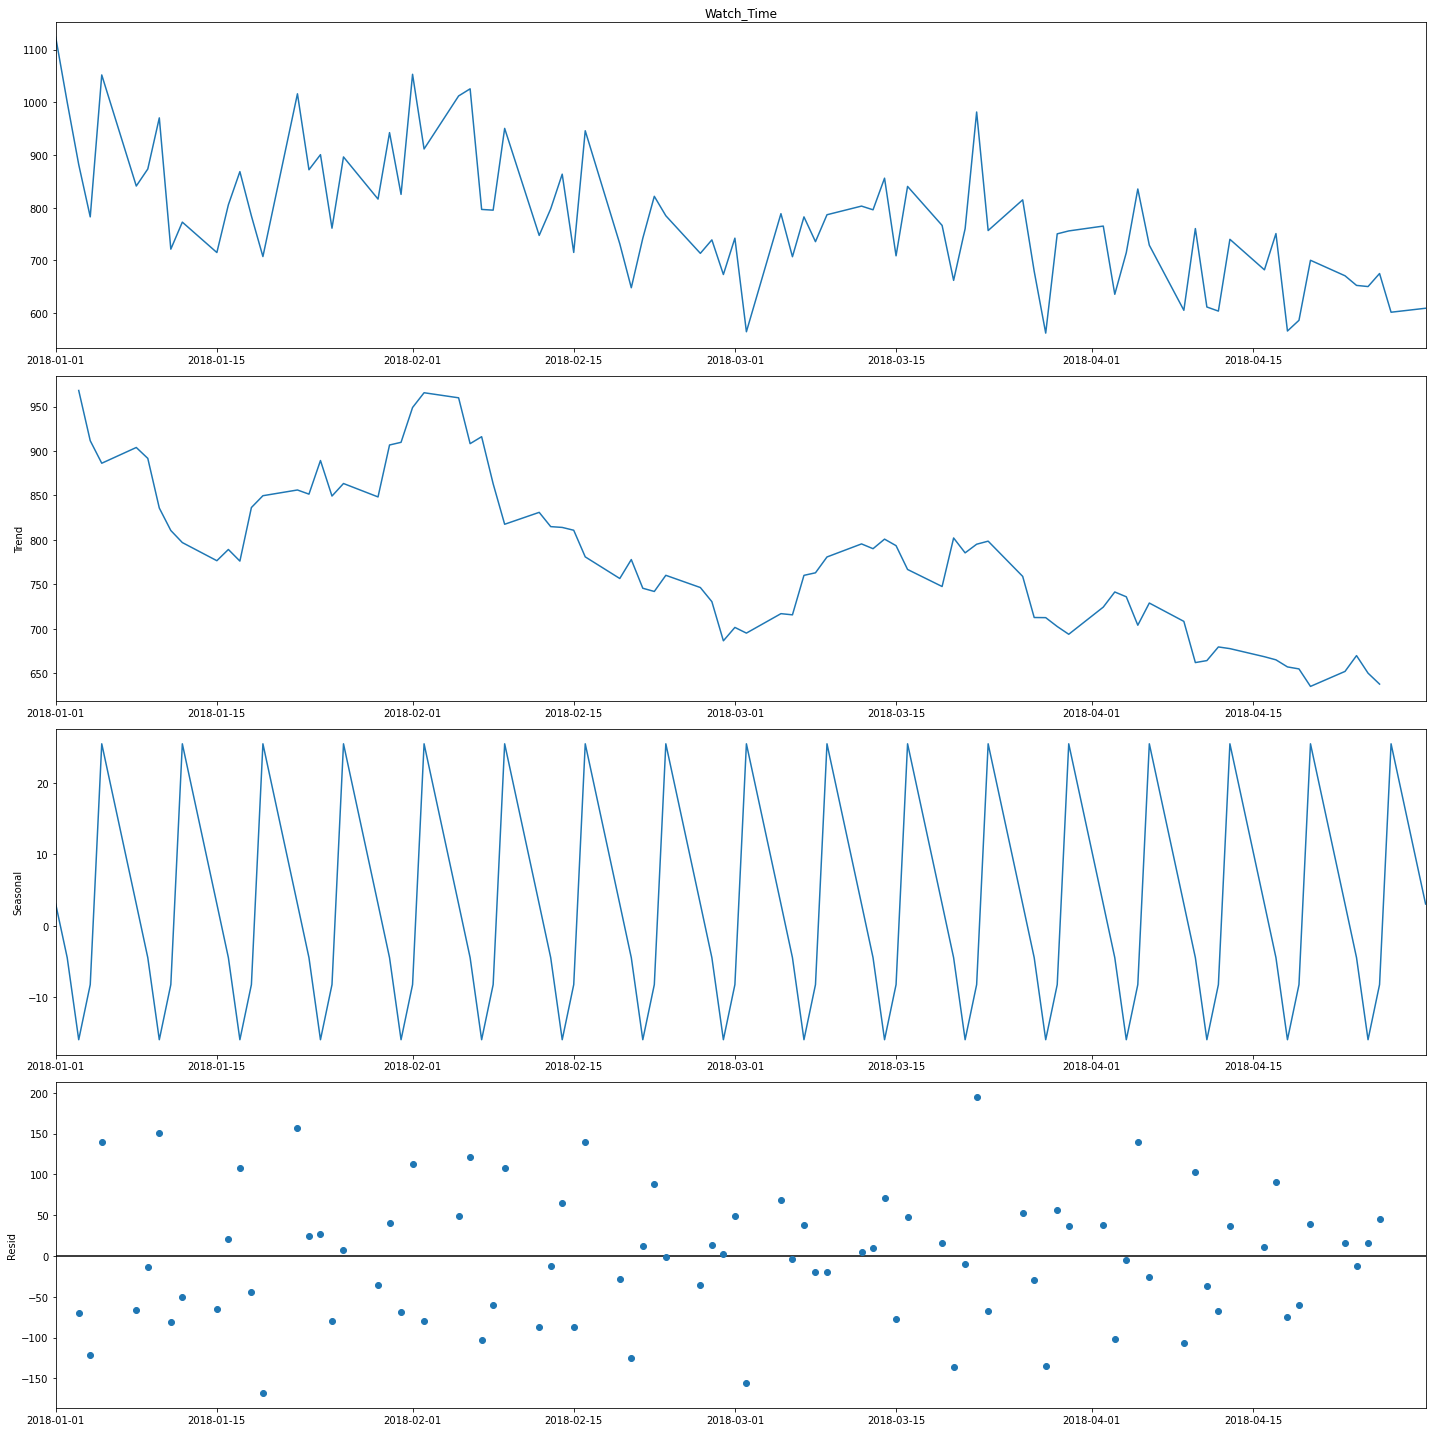

In [40]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results

"""

df = dataframe.copy()
df = df.rename(columns={"Total_watch_time_in_houres": "Watch_Time"})# Watch_Time is in hours

plt.rcParams['figure.figsize'] = (20, 20)
decomposition = sm.tsa.seasonal_decompose(df["Watch_Time"], model='additive')
fig = decomposition.plot()
plt.show()


In [16]:

# Statiscial way to check for stationarity
# Ho: It is non stationary
#H1: It is stationary
test_results = adfuller(df["Watch_Time"])
labels = ['ADF Test Statistic', 'p-value',
          '#Lags Used', 'Number of Observations Used']
for value, label in zip(test_results, labels):
    print(label+' : '+str(value))
if test_results[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


ADF Test Statistic : -1.7279558881675476
p-value : 0.41676935469919785
#Lags Used : 3
Number of Observations Used : 82
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [50]:
# To find pdq
p = q = (0, 8)
d = (0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))] ##using 7 for number of days in a week with the given data i belive thier might be seasnoality weekly ( on weekends)
sqd = []
rmse =[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df["Watch_Time"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)
            
            results = mod.fit(disp=0)

            sqd.append('ARIMA{}x{}'.format(param, param_seasonal))
            rmse.append(results.aic)
        except:
            continue

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_m

In [52]:
pdqCombinations=pd.DataFrame(index=sqd,data=rmse,columns=['RMSE']).sort_values(by=['RMSE'],ascending=True)
pdqCombinations.head()

,RMSE
"ARIMA(0, 0, 0)x(0, 2, 8, 7)",927.278820
"ARIMA(8, 2, 0)x(0, 2, 8, 7)",929.864928
"ARIMA(0, 0, 0)x(8, 2, 0, 7)",933.134589
"ARIMA(8, 2, 8)x(0, 2, 0, 7)",937.722421
"ARIMA(0, 0, 8)x(8, 2, 0, 7)",942.730554


In [53]:
mod = sm.tsa.statespace.SARIMAX(df["Watch_Time"],
                                order=(0, 0, 0),
                                seasonal_order=(0, 2, 8, 7),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit(disp=0)
print(results.summary().tables[1])

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -4.3878    124.241     -0.035      0.972    -247.895     239.119
ma.S.L14       5.0536    181.334      0.028      0.978    -350.355     360.462
ma.S.L21      -0.8743     63.499     -0.014      0.989    -125.329     123.581
ma.S.L28      -0.8035     27.481     -0.029      0.977     -54.665      53.058
ma.S.L35      -0.9363     21.043     -0.044      0.965     -42.180      40.308
ma.S.L42       0.6025     23.969      0.025      0.980     -46.376      47.581
ma.S.L49       0.3072      3.736      0.082      0.934      -7.016       7.631
ma.S.L56       0.1757      1.462      0.120      0.904      -2.691       3.042
sigma2      1086.5077   7.04e+04      0.015      0.988   -1.37e+05    1.39e+05


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



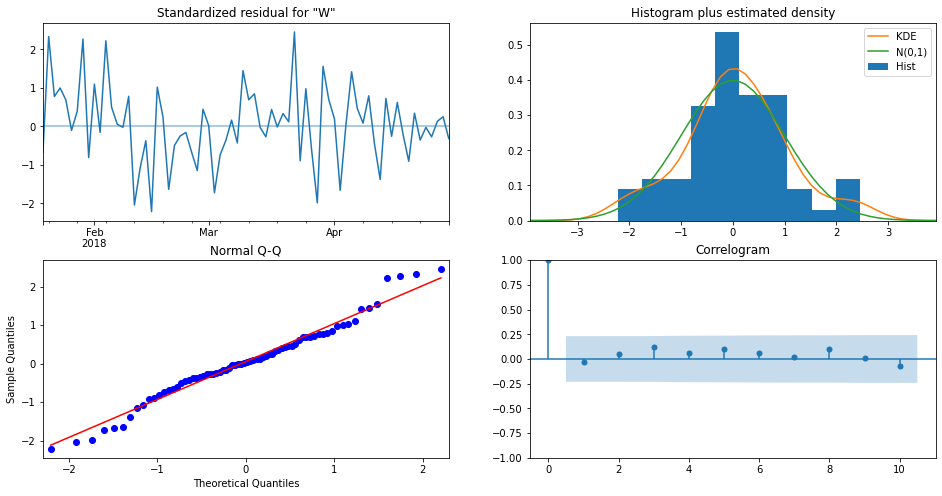

In [54]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

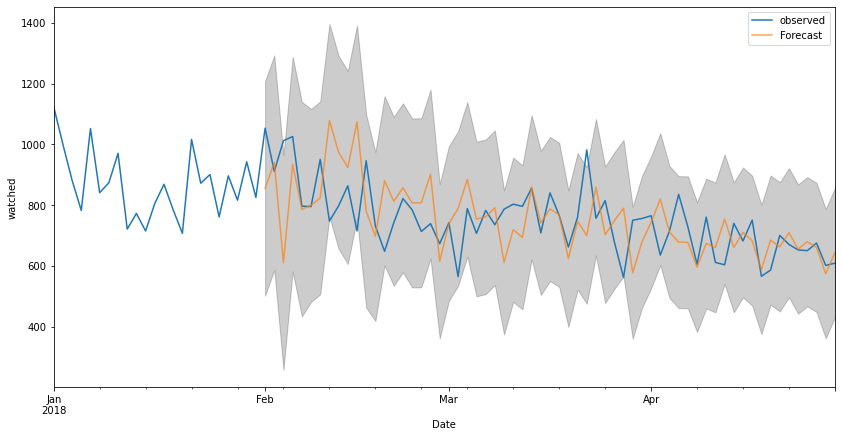

In [56]:
# show the Model out come agianst the actual data
pred = results.get_prediction(start=pd.to_datetime('2018-02-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['Watch_Time'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('watched')
plt.legend()
plt.show()

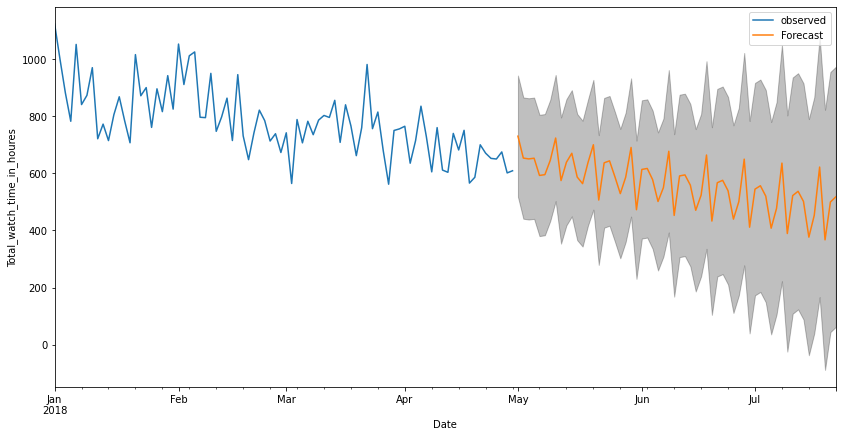

In [58]:
# show forecasts 
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = df['Watch_Time'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total_watch_time_in_houres')
plt.legend()
plt.show()